In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.utils import shuffle
import os

from utils.DomainImageGenerator import DomainImageGenerator

In [2]:
# Load the Dataset as Generators so not all images are loaded into ram at the same time. The generator class loads the needed images per batch
train_gen = DomainImageGenerator("prepared/train.csv", batch_size=64, img_size=(32, 32), shuffle=True) # "batch_size=64, img_size=(32, 32), shuffle=True]" are the default values
val_gen = DomainImageGenerator("prepared/valid.csv", batch_size=64)
test_gen = DomainImageGenerator("prepared/test.csv", batch_size=64)

In [3]:
### Load the Dataset without a generator (not recommended)
### x contains an array with dimensions (n_samples, 32, 32, 3) where 32x32 is the image size and 3 is for the different color channels
### The values are scaled between 0 and 1
### y contains an array with dimensions (n_samples, 1) where the labels are given as either 0 or 1

# from utils.utils_ModelTraining import load_data_all_splits, prepare_dataset
# train_df, val_df, test_df = load_data_all_splits()

# print("Train Data")
# x_train, y_train = prepare_dataset(train_df)
# print("Validation Data")
# x_val, y_val = prepare_dataset(val_df)

In [4]:
model = models.Sequential([
    layers.Input(shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # binary classification
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 166,977 (652.25 KB)

 Trainable params: 166,977 (652.25 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
history = model.fit(train_gen,
          validation_data=val_gen,
          epochs=20)

Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - accuracy: 0.8242 - loss: 0.3984 - val_accuracy: 0.9373 - val_loss: 0.1856
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 39s 28ms/step - accuracy: 0.9347 - loss: 0.1803 - val_accuracy: 0.9375 - val_loss: 0.1547
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 39s 28ms/step - accuracy: 0.9578 - loss: 0.1219 - val_accuracy: 0.9697 - val_loss: 0.0889
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 38s 27ms/step - accuracy: 0.9673 - loss: 0.0953 - val_accuracy: 0.9701 - val_loss: 0.0947
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 38s 27ms/step - accuracy: 0.9696 - loss: 0.0881 - val_accuracy: 0.9750 - val_loss: 0.0746
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 38s 27ms/step - accuracy: 0.9739 - loss: 0.0771 - val_accuracy: 0.9697 - val_loss: 0.0840
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 38s 27ms/step - accuracy: 0.9747 - loss: 0.0714 - val_accuracy: 0.9707 - val_loss: 0.0840
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 38s 27ms/step - accuracy: 0.9768 -

In [7]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


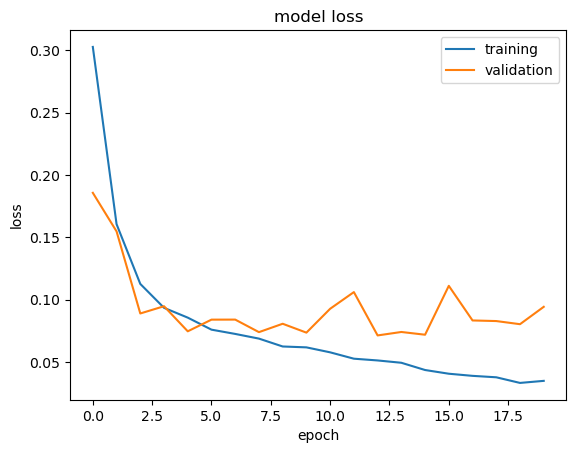

In [8]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

In [9]:
model.save("../models/SimpleExampleKerasModel.keras")